In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
import sys
import numpy as np

In [2]:
kcat_file = '/home/wuke/project/bio_deeplearning/zzz_benchmark/data/EITLEM_KCAT.csv'
km_file = '/home/wuke/project/bio_deeplearning/zzz_benchmark/data/EITLEM_KM.csv'
kkm_file = '/home/wuke/project/bio_deeplearning/zzz_benchmark/data/EITLEM_KKM.csv'

In [3]:
kcat_data = pd.read_csv(kcat_file)
km_data = pd.read_csv(km_file)
kkm_data = pd.read_csv(kkm_file)

In [4]:
kcat_data.head(1)
kcat_data_wildtype_num = len(kcat_data[kcat_data['type']=='wild'])
kcat_data_mutant_num = len(kcat_data[kcat_data['type']=='mutant'])

km_data_wildtype_num = len(km_data[km_data['type']=='wild'])
km_data_mutant_num = len(km_data[km_data['type']=='mutant'])

kkm_data_wildtype_num = len(kkm_data[kkm_data['type']=='wild'])
kkm_data_mutant_num = len(kkm_data[kkm_data['type']=='mutant'])
print(kcat_data_wildtype_num,kcat_data_mutant_num)
print(km_data_wildtype_num,km_data_mutant_num)
print(kkm_data_wildtype_num,kkm_data_mutant_num)

19501 14639
17661 10633
7904 5358


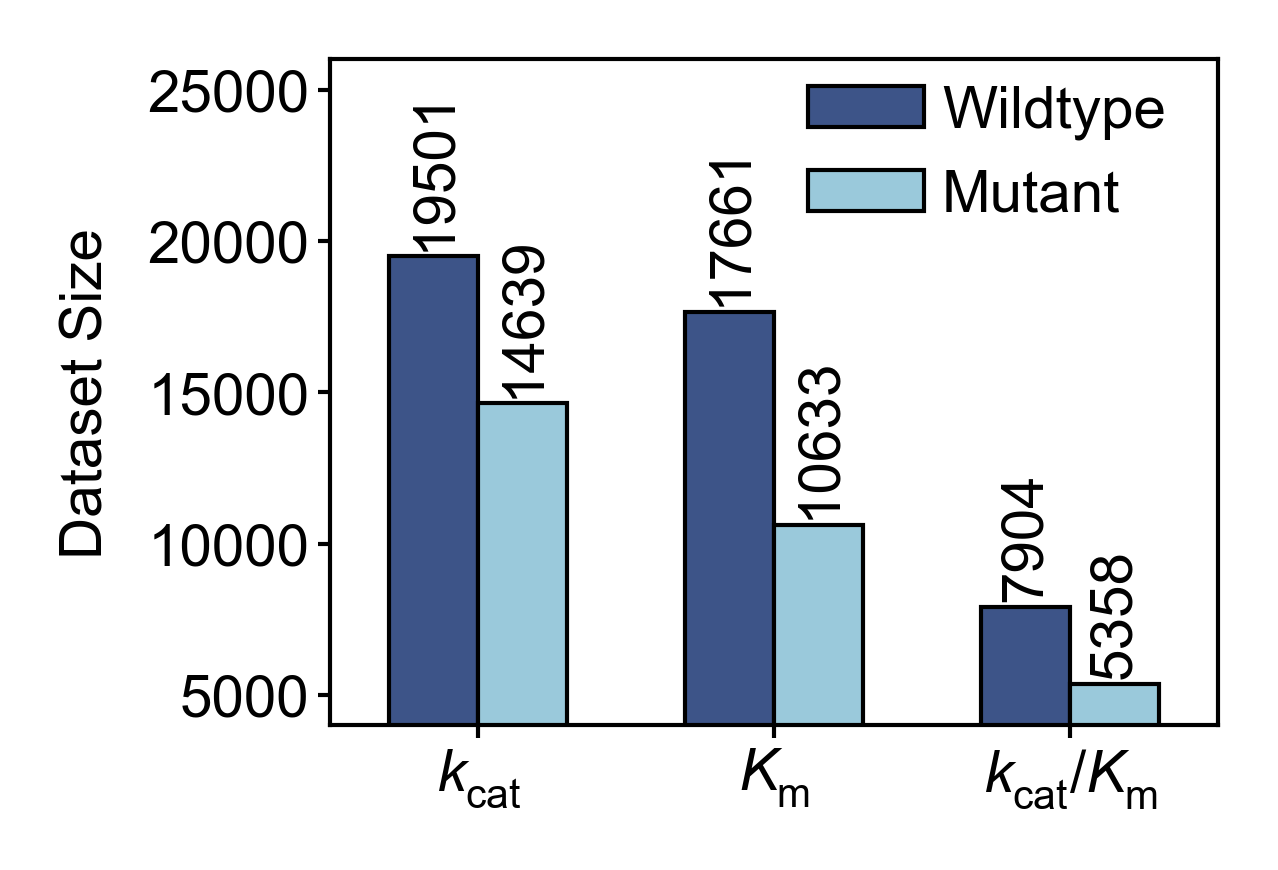

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(2, 1.5), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.13, right=0.87, bottom=0.13, top=0.87)

x_pos = [0, 1, 2]
wild = [kcat_data_wildtype_num, km_data_wildtype_num, kkm_data_wildtype_num]
mutant = [kcat_data_mutant_num, km_data_mutant_num, kkm_data_mutant_num]

width = 0.3
bars_wild = plt.bar([i - width/2 for i in x_pos], wild, color='#3D5488', width=width, edgecolor='black', linewidth=0.5, label='Wildtype', alpha=1)
# '#808080','#3D5488','#9AC9DB',
bars_mutant = plt.bar([i + width/2 for i in x_pos], mutant, color='#9AC9DB', width=width, edgecolor='black', linewidth=0.5, label='Mutant', alpha=1)

plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.xticks(x_pos, [r'$\mathit{k}_\mathrm{cat}$', r'$\mathit{K}_\mathrm{m}$', r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$'], fontsize=7, rotation=0)
plt.yticks([5000, 10000, 15000, 20000, 25000], fontsize=7)
plt.ylabel('Dataset Size', fontsize=7)
# plt.xlabel('Dataset', fontsize=7)
plt.ylim(4000, 26000)
plt.xlim(-0.5, 2.5)
plt.legend(frameon=False, fontsize=7, loc='upper right', bbox_to_anchor=(1, 1.04), ncol=1, labelspacing=0.5, handletextpad=0.3)

for bars in [bars_wild, bars_mutant]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height+200, str(int(height)), ha='center', va='bottom', fontsize=7, rotation=90)

plt.savefig('./pdf/figS1a.pdf',dpi=600, bbox_inches='tight')
plt.show()


In [6]:
kcat_data_wild = kcat_data[kcat_data['type']=='wild']
kcat_data_wild_sequence = set(kcat_data_wild['Sequence'])
print(len(kcat_data_wild_sequence))

km_data_wild = km_data[km_data['type']=='wild']
km_data_wild_sequence = set(km_data_wild['Sequence'])
print(len(km_data_wild_sequence))

kkm_data_wild = kkm_data[kkm_data['type']=='wild']
kkm_data_wild_sequence = set(kkm_data_wild['Sequence'])
print(len(kkm_data_wild_sequence))

6472
7006
2923


/home/wuke/anaconda3/envs/protssn/lib/python3.12/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


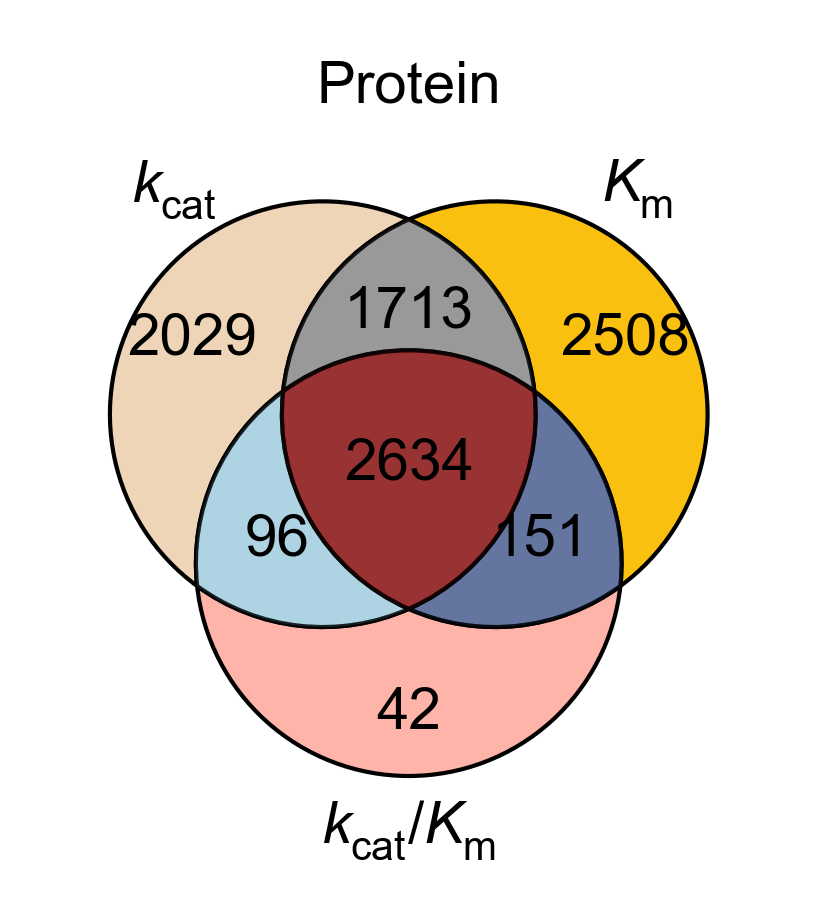

In [7]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

A = set(kcat_data_wild_sequence) 
B = set(km_data_wild_sequence)
C = set(kkm_data_wild_sequence)

# Set general parameters
plt.figure(figsize=(1.5, 1.5), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

# Draw Venn diagram
venn_labels = [r'$\mathit{k}_\mathrm{cat}$', r'$\mathit{K}_\mathrm{m}$', r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$']

# Create the Venn diagram
venn_diagram = venn3_unweighted([A, B, C], set_labels=venn_labels)

# Set color for the different regions
venn_diagram.get_patch_by_id('100').set_facecolor('#EED5B7')  # A only
venn_diagram.get_patch_by_id('100').set_edgecolor('black')
venn_diagram.get_patch_by_id('100').set_alpha(1)
venn_diagram.get_patch_by_id('100').set_linewidth(0.5)

venn_diagram.get_patch_by_id('010').set_facecolor('#F9C00F')  # B only
venn_diagram.get_patch_by_id('010').set_edgecolor('black')
venn_diagram.get_patch_by_id('010').set_alpha(1)
venn_diagram.get_patch_by_id('010').set_linewidth(0.5)

venn_diagram.get_patch_by_id('001').set_facecolor('#FEB4A9')  # C only
venn_diagram.get_patch_by_id('001').set_edgecolor('black')
venn_diagram.get_patch_by_id('001').set_alpha(1)
venn_diagram.get_patch_by_id('001').set_linewidth(0.5)

venn_diagram.get_patch_by_id('110').set_facecolor('#808080')  # A & B
venn_diagram.get_patch_by_id('110').set_edgecolor('black')
venn_diagram.get_patch_by_id('110').set_alpha(0.8)
venn_diagram.get_patch_by_id('110').set_linewidth(0.5)

venn_diagram.get_patch_by_id('011').set_facecolor('#3D5488')  # B & C
venn_diagram.get_patch_by_id('011').set_edgecolor('black')
venn_diagram.get_patch_by_id('011').set_alpha(0.8)
venn_diagram.get_patch_by_id('011').set_linewidth(0.5)

venn_diagram.get_patch_by_id('101').set_facecolor('#9AC9DB')  # A & C
venn_diagram.get_patch_by_id('101').set_edgecolor('black')
venn_diagram.get_patch_by_id('101').set_alpha(0.8)
venn_diagram.get_patch_by_id('101').set_linewidth(0.5)

venn_diagram.get_patch_by_id('111').set_facecolor('#800000')  # A & B & C
venn_diagram.get_patch_by_id('111').set_edgecolor('black')
venn_diagram.get_patch_by_id('111').set_alpha(0.8)
venn_diagram.get_patch_by_id('111').set_linewidth(0.5)

# Modify the font size of the numbers in the Venn diagram
for text in venn_diagram.set_labels:
    text.set_fontsize(7)

for text in venn_diagram.subset_labels:
    text.set_fontsize(7)

plt.title('Protein',fontsize=7)

# Save the figure
plt.savefig('./pdf/figS1b.pdf',dpi=600, bbox_inches='tight')
# plt.savefig(undergroundgene_coregene_venn_figure_path, dpi=600, bbox_inches='tight')
plt.show()

In [8]:
kcat_data_smiles = set(kcat_data['Smiles'])
print(len(kcat_data_smiles))

km_data_smiles = set(km_data['Smiles'])
print(len(km_data_smiles))

kkm_data_smiles = set(kkm_data['Smiles'])
print(len(kkm_data_smiles))

5985
5033
2810


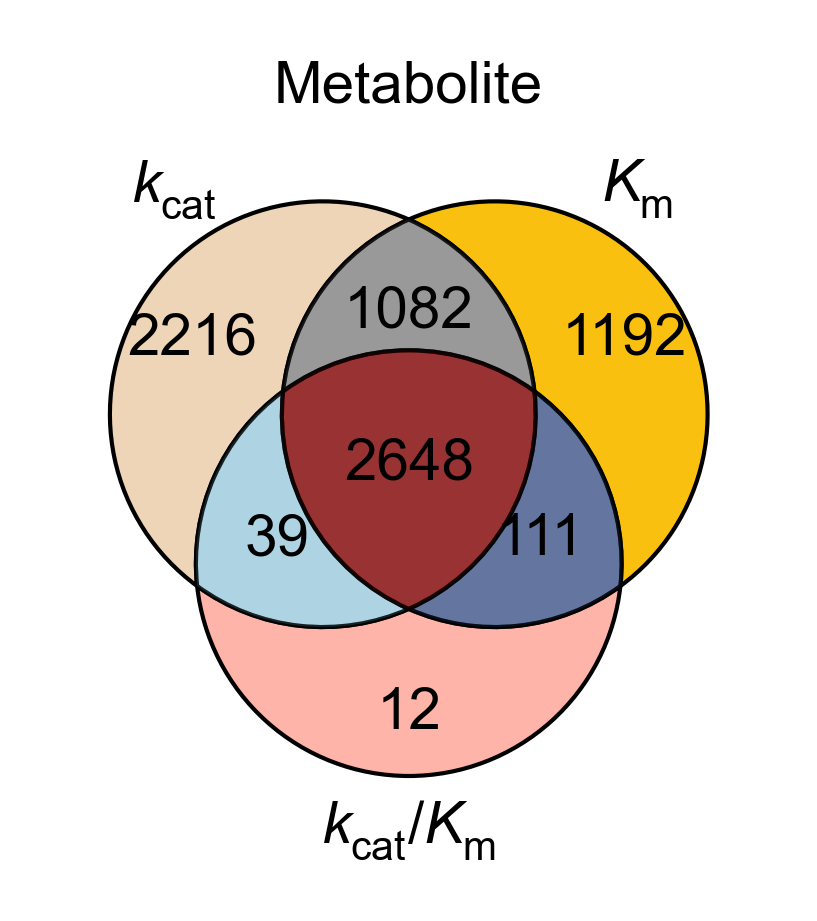

In [9]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

A = set(kcat_data_smiles) 
B = set(km_data_smiles)
C = set(kkm_data_smiles)

# Set general parameters
plt.figure(figsize=(1.5, 1.5), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

# Draw Venn diagram
venn_labels = [r'$\mathit{k}_\mathrm{cat}$', r'$\mathit{K}_\mathrm{m}$', r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$']

# Create the Venn diagram
venn_diagram = venn3_unweighted([A, B, C], set_labels=venn_labels)

# Set color for the different regions
venn_diagram.get_patch_by_id('100').set_facecolor('#EED5B7')  # A only
venn_diagram.get_patch_by_id('100').set_edgecolor('black')
venn_diagram.get_patch_by_id('100').set_alpha(1)
venn_diagram.get_patch_by_id('100').set_linewidth(0.5)

venn_diagram.get_patch_by_id('010').set_facecolor('#F9C00F')  # B only
venn_diagram.get_patch_by_id('010').set_edgecolor('black')
venn_diagram.get_patch_by_id('010').set_alpha(1)
venn_diagram.get_patch_by_id('010').set_linewidth(0.5)

venn_diagram.get_patch_by_id('001').set_facecolor('#FEB4A9')  # C only
venn_diagram.get_patch_by_id('001').set_edgecolor('black')
venn_diagram.get_patch_by_id('001').set_alpha(1)
venn_diagram.get_patch_by_id('001').set_linewidth(0.5)

venn_diagram.get_patch_by_id('110').set_facecolor('#808080')  # A & B
venn_diagram.get_patch_by_id('110').set_edgecolor('black')
venn_diagram.get_patch_by_id('110').set_alpha(0.8)
venn_diagram.get_patch_by_id('110').set_linewidth(0.5)

venn_diagram.get_patch_by_id('011').set_facecolor('#3D5488')  # B & C
venn_diagram.get_patch_by_id('011').set_edgecolor('black')
venn_diagram.get_patch_by_id('011').set_alpha(0.8)
venn_diagram.get_patch_by_id('011').set_linewidth(0.5)

venn_diagram.get_patch_by_id('101').set_facecolor('#9AC9DB')  # A & C
venn_diagram.get_patch_by_id('101').set_edgecolor('black')
venn_diagram.get_patch_by_id('101').set_alpha(0.8)
venn_diagram.get_patch_by_id('101').set_linewidth(0.5)

venn_diagram.get_patch_by_id('111').set_facecolor('#800000')  # A & B & C
venn_diagram.get_patch_by_id('111').set_edgecolor('black')
venn_diagram.get_patch_by_id('111').set_alpha(0.8)
venn_diagram.get_patch_by_id('111').set_linewidth(0.5)
# Modify the font size of the numbers in the Venn diagram
for text in venn_diagram.set_labels:
    text.set_fontsize(7)

for text in venn_diagram.subset_labels:
    text.set_fontsize(7)

plt.title('Metabolite',fontsize=7)
# Save the figure
plt.savefig('./pdf/figS1c.pdf',dpi=600, bbox_inches='tight')
plt.show()

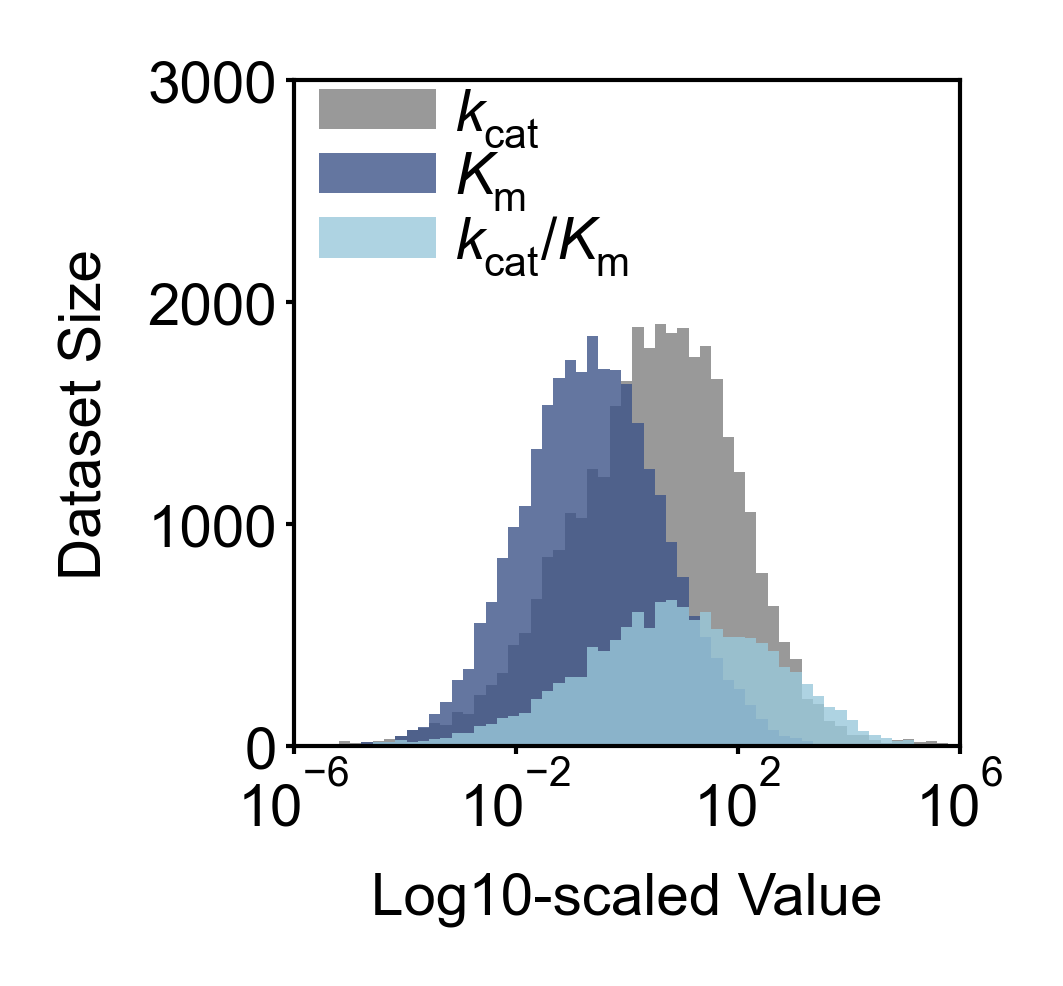

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(1.5, 1.5), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.13, right=0.87, bottom=0.13, top=0.87)

log_bins = np.logspace(np.log10(0.000001), np.log10(1000000), 60)
plt.hist(kcat_data['Value'], bins=log_bins,color='#808080',label=r'$\mathit{k}_\mathrm{cat}$',alpha=0.8, edgecolor='none', linewidth=0.5)
plt.hist(km_data['Value'], bins=log_bins,color='#3D5488',label=r'$\mathit{K}_\mathrm{m}$',alpha=0.8, edgecolor='none', linewidth=0.5)
plt.hist(kkm_data['Value'], bins=log_bins,color='#9AC9DB',label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$',alpha=0.8, edgecolor='none', linewidth=0.5)

plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1, pad=1)
plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=1)
plt.ylabel('Dataset Size', fontsize=7)
plt.xlabel('Log10-scaled Value', fontsize=7)
plt.ylim(0,3000)
plt.xlim(0.000001,1000000)
plt.xscale('log')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.legend(frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(-0.04, 1.07), ncol=1, labelspacing=0.01, handletextpad=0.3)

plt.gca().set_aspect('auto', adjustable='box')
plt.savefig('./pdf/figS1d.pdf',dpi=600, bbox_inches='tight')
plt.show()